# Podstawy Sztucznej Inteligencji 2020/2021


Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

# SVM in sklearn



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

X = np.array([[1,2],[-1,2],[-1,-2],[3,1]])
y = np.array([-1,-1,1,1])

In [2]:
X,y

(array([[ 1,  2],
        [-1,  2],
        [-1, -2],
        [ 3,  1]]), array([-1, -1,  1,  1]))

In [8]:
svm = SVC(kernel="linear", C=1)
svm.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

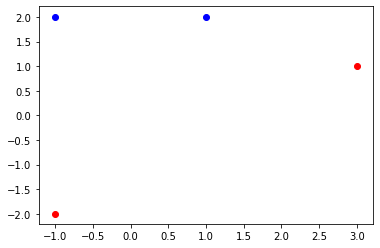

In [10]:
plt.scatter(X[y==-1, 0], X[y==-1, 1], c='b')
plt.scatter(X[y==1, 0], X[y==1, 1], c='r')
plt.show()

In [11]:
x_min, x_max = -3.3, 3.3
xx, yy = np.meshgrid(*(2*(np.linspace(x_min, x_max, 90), )))
xy = np.stack([xx.ravel(), yy.ravel()]).T

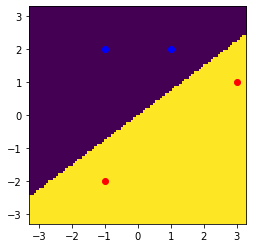

In [12]:
z = svm.predict(xy).reshape(90, 90)
plt.imshow(z, extent=[x_min, x_max, x_min, x_max], origin='lower')
plt.scatter(X[y==-1,0], X[y==-1,1], c='b')
plt.scatter(X[y==1,0], X[y==1,1], c='r')

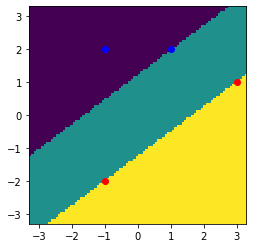

In [13]:
z = svm.decision_function(xy).reshape(90,90)

z[z>1] = 1
z[z<-1] = -1
z[(z>-1) & (z<1)] = 0

plt.imshow(z, extent=[x_min, x_max,x_min, x_max], origin='lower')
plt.scatter(X[y==-1, 0], X[y==-1, 1], c='b')
plt.scatter(X[y==1, 0], X[y==1, 1], c='r')

In [14]:
w = svm.coef_[0]
t = svm.intercept_[0]

In [19]:
svm.coef_.shape

(1, 2)

In [15]:
np.testing.assert_allclose(w,(3/5, -4/5),atol=1e-4)
np.testing.assert_allclose(t,0.0,atol=1e-4)


## Zależność dopasowania od $C$

In [16]:
from ipywidgets import FloatSlider,interact
from IPython.display import clear_output

In [18]:
@interact(C_ = FloatSlider(min=0.01, max=1, step=0.01, value=1))
def __(C_):
    svm = SVC(kernel="linear", C=C_)
    svm.fit(X, y)
    
    z = svm.decision_function(xy).reshape(90, 90)
    z[z>1] = 1
    z[z<-1] = -1
    z[(z>-1) & (z<1)] = 0
    
    plt.imshow(z, extent=[x_min, x_max, x_min, x_max], origin='lower')
    plt.scatter(X[y==-1, 0], X[y==-1, 1], c='b', s=120)
    plt.scatter(X[y==1, 0], X[y==1, 1], c='r', s=120)
    plt.scatter(*(svm.support_vectors_.T), c='k')
    clear_output(wait=True)
    print(svm.dual_coef_)
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='C_', max=1.0, min=0.01, step=0.01), Output()), _dom_…